In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_set_path = r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI_rev\New Database\Na_W_Mn_Cat_train_rev.csv'
train_set = pd.read_csv(train_set_path)

test_set_path = r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI_rev\New Database\Na_W_Mn_Cat_test_rev.csv'
test_set = pd.read_csv(test_set_path)

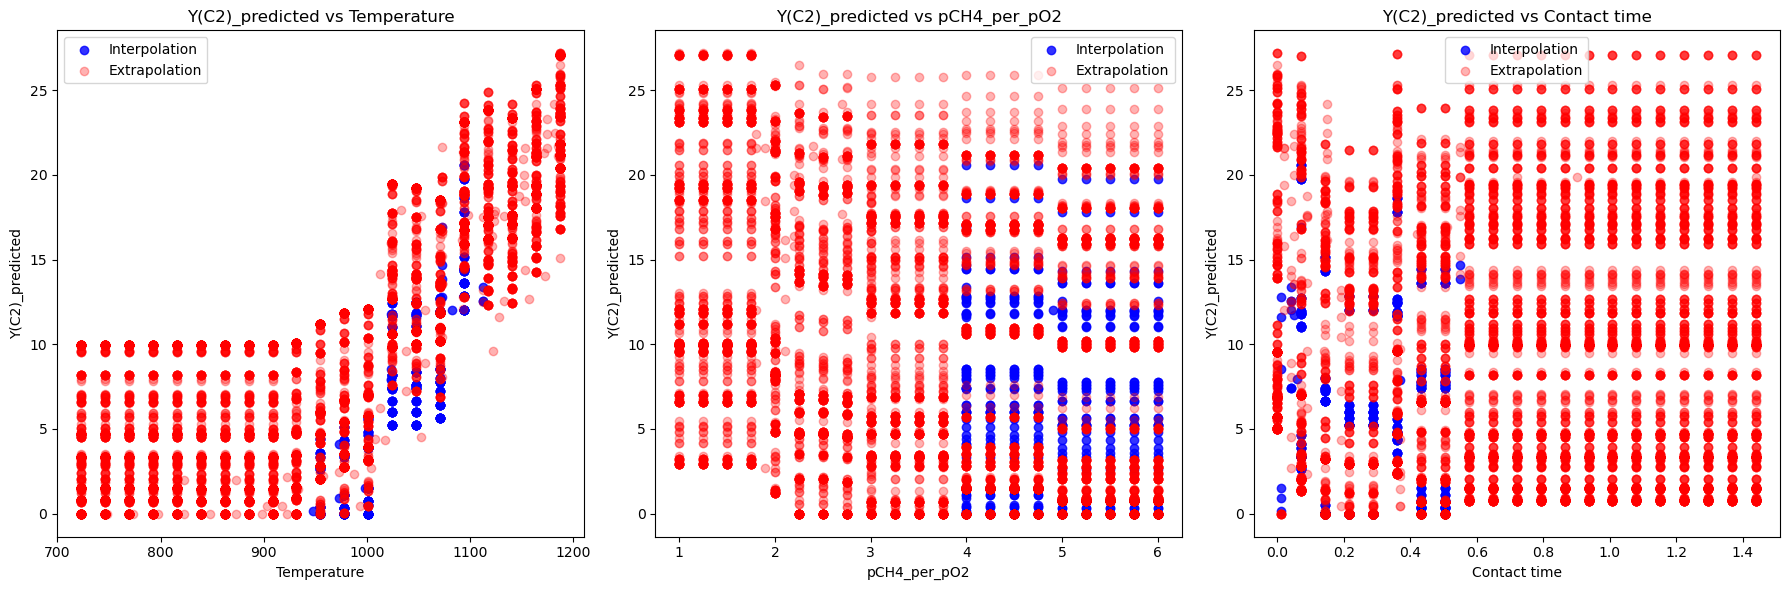

In [2]:
# Function to plot 2D scatter
def plot_2d_scatter(ax, df, x_col, y_col, label, color, alpha):
    ax.scatter(df[x_col], df[y_col], color=color, label=label, alpha=alpha)

# Create 2D scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Y(C2)_predicted vs Temperature
plot_2d_scatter(axes[0], train_set, 'Temperature', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8)
plot_2d_scatter(axes[0], test_set, 'Temperature', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3)
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Y(C2)_predicted')
axes[0].set_title('Y(C2)_predicted vs Temperature')

# Plot 2: Y(C2)_predicted vs pCH4_per_pO2
plot_2d_scatter(axes[1], train_set, 'pCH4_per_pO2', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8)
plot_2d_scatter(axes[1], test_set, 'pCH4_per_pO2', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3)
axes[1].set_xlabel('pCH4_per_pO2')
axes[1].set_ylabel('Y(C2)_predicted')
axes[1].set_title('Y(C2)_predicted vs pCH4_per_pO2')

# Plot 3: Y(C2)_predicted vs Contact time
plot_2d_scatter(axes[2], train_set, 'Contact time', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8)
plot_2d_scatter(axes[2], test_set, 'Contact time', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3)
axes[2].set_xlabel('Contact time')
axes[2].set_ylabel('Y(C2)_predicted')
axes[2].set_title('Y(C2)_predicted vs Contact time')

# Adding legends and displaying the plots
for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

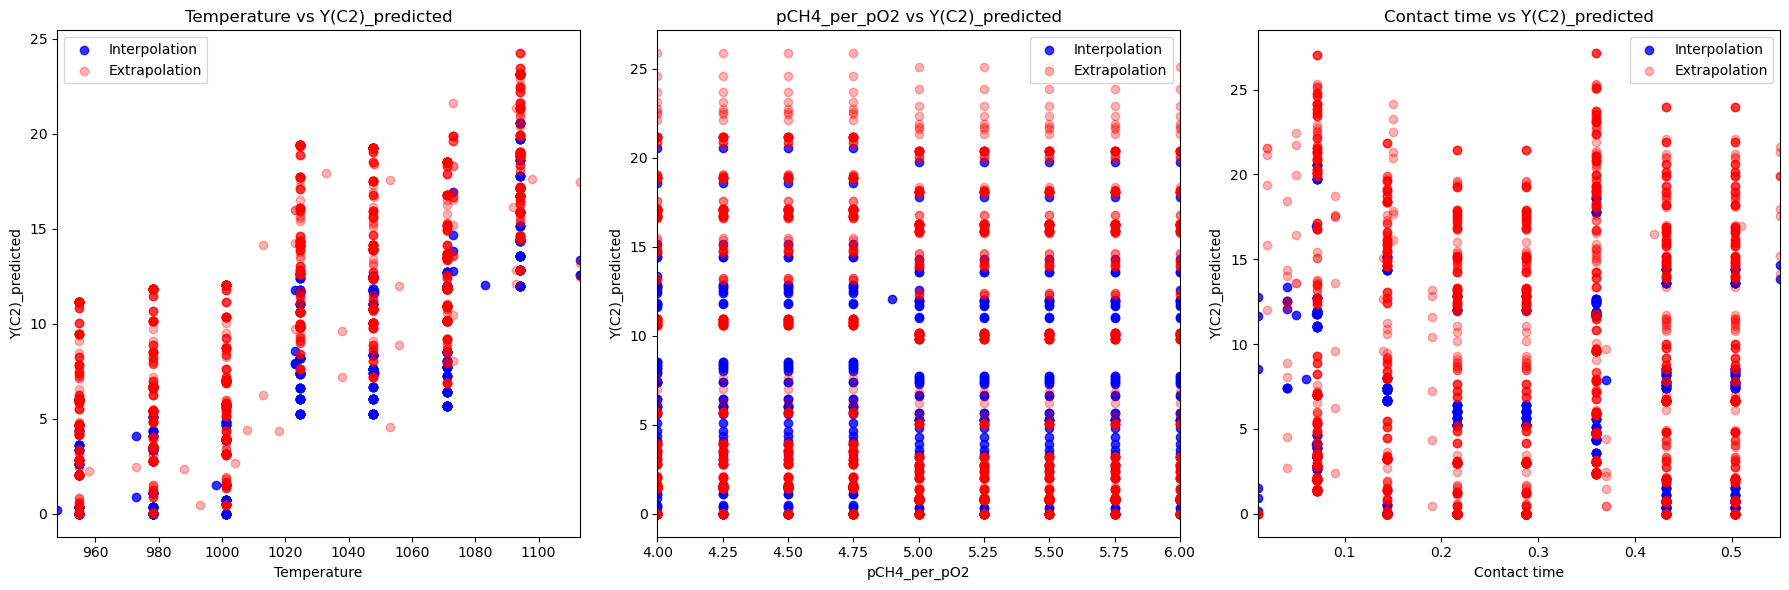

In [3]:
import matplotlib.pyplot as plt

# Function to plot 2D scatter with specified axis ranges
def plot_2d_scatter_with_range(ax, df, x_col, y_col, label, color, alpha, x_range):
    # Filter the dataframe based on the x_range
    filtered_df = df[(df[x_col] >= x_range[0]) & (df[x_col] <= x_range[1])]
    ax.scatter(filtered_df[x_col], filtered_df[y_col], color=color, label=label, alpha=alpha)

# Define the ranges for each variable
temperature_range = (train_set['Temperature'].min(), train_set['Temperature'].max())
pCH4_per_pO2_range = (train_set['pCH4_per_pO2'].min(), train_set['pCH4_per_pO2'].max())
contact_time_range = (train_set['Contact time'].min(), train_set['Contact time'].max())
y_predicted_range = (train_set['Y(C2)_predicted'].min(), train_set['Y(C2)_predicted'].max())

# Function to plot 2D scatter with specified axis ranges
def plot_2d_scatter_with_range(ax, df, x_col, y_col, label, color, alpha, x_range):
    filtered_df = df[(df[x_col] >= x_range[0]) & (df[x_col] <= x_range[1])]
    ax.scatter(filtered_df[x_col], filtered_df[y_col], color=color, label=label, alpha=alpha)

# Create 2D scatter plots with specified ranges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Temperature vs Y(C2)_predicted
plot_2d_scatter_with_range(axes[0], train_set, 'Temperature', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8, temperature_range)
plot_2d_scatter_with_range(axes[0], test_set, 'Temperature', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3, temperature_range)
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Y(C2)_predicted')
axes[0].set_xlim(temperature_range)
axes[0].set_title('Temperature vs Y(C2)_predicted')

# Plot 2: pCH4_per_pO2 vs Y(C2)_predicted
plot_2d_scatter_with_range(axes[1], train_set, 'pCH4_per_pO2', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8, pCH4_per_pO2_range)
plot_2d_scatter_with_range(axes[1], test_set, 'pCH4_per_pO2', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3, pCH4_per_pO2_range)
axes[1].set_xlabel('pCH4_per_pO2')
axes[1].set_ylabel('Y(C2)_predicted')
axes[1].set_xlim(pCH4_per_pO2_range)
axes[1].set_title('pCH4_per_pO2 vs Y(C2)_predicted')

# Plot 3: Contact time vs Y(C2)_predicted
plot_2d_scatter_with_range(axes[2], train_set, 'Contact time', 'Y(C2)_predicted', 'Interpolation', 'blue', 0.8, contact_time_range)
plot_2d_scatter_with_range(axes[2], test_set, 'Contact time', 'Y(C2)_predicted', 'Extrapolation', 'red', 0.3, contact_time_range)
axes[2].set_xlabel('Contact time')
axes[2].set_ylabel('Y(C2)_predicted')
axes[2].set_xlim(contact_time_range)
axes[2].set_title('Contact time vs Y(C2)_predicted')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

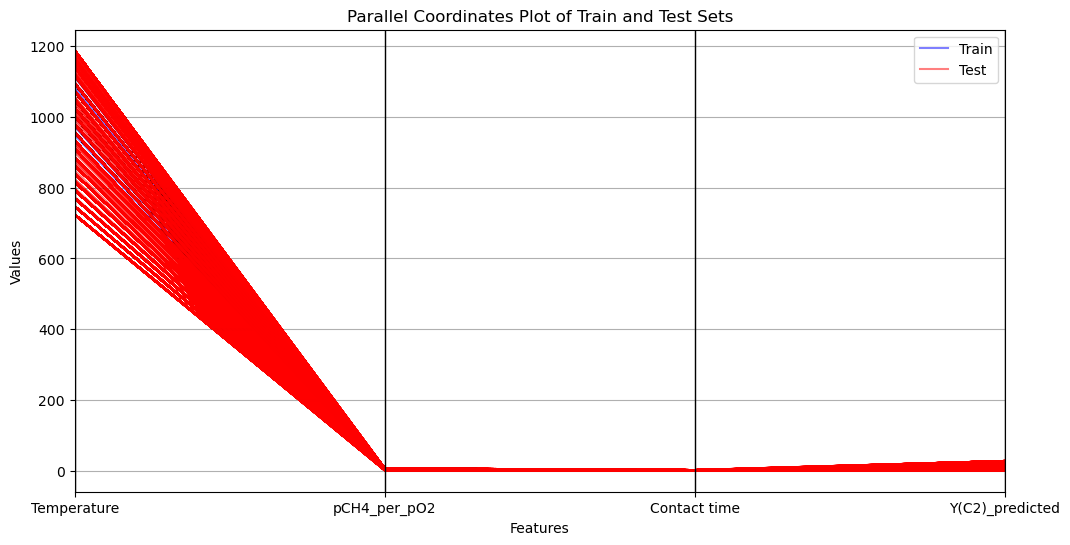

In [4]:
from pandas.plotting import parallel_coordinates

# To plot parallel coordinates, we need to label each row of our datasets
train_set['DataSet'] = 'Train'
test_set['DataSet'] = 'Test'

# Combining the datasets for plotting
combined_data = pd.concat([train_set, test_set])

# Creating the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(combined_data, 'DataSet', color=['blue', 'red'], alpha=0.5)
plt.title('Parallel Coordinates Plot of Train and Test Sets')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

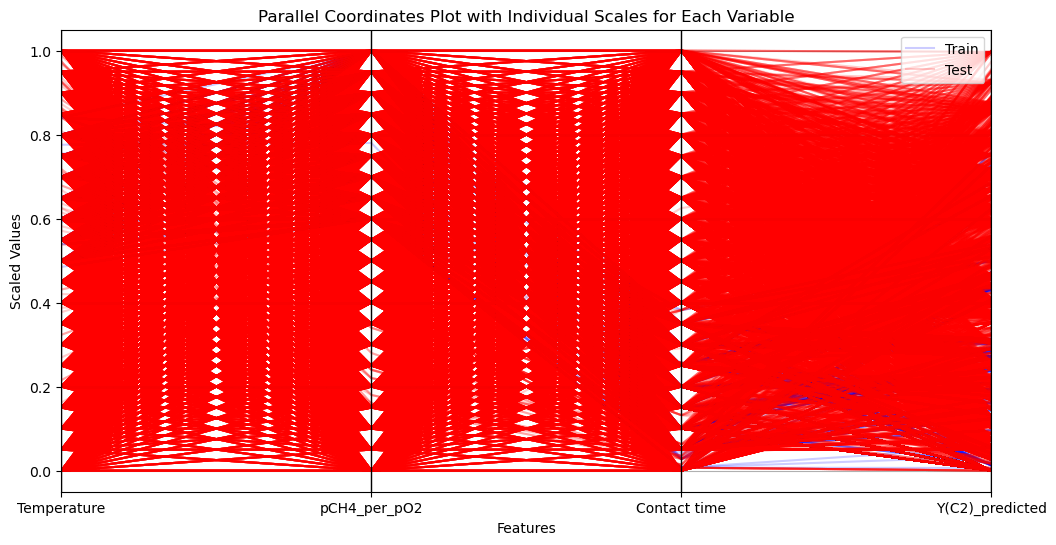

In [5]:
def scale_to_common_range(data, columns):
    """
    Scales each column in 'columns' of the dataframe 'data' to a common range [0, 1].
    This is done individually for each column to maintain their separate scales.
    """
    scaled_data = data.copy()
    for col in columns:
        min_val = data[col].min()
        max_val = data[col].max()
        scaled_data[col] = (data[col] - min_val) / (max_val - min_val)
    return scaled_data

# Columns to be scaled
columns_to_scale = ['Temperature', 'pCH4_per_pO2', 'Contact time', 'Y(C2)_predicted']

# Scaling the data
scaled_combined_data = scale_to_common_range(combined_data, columns_to_scale)

# Creating the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(scaled_combined_data, 'DataSet', color=['blue', 'red'], alpha=0.2)
plt.title('Parallel Coordinates Plot with Individual Scales for Each Variable')
plt.ylabel('Scaled Values')
plt.xlabel('Features')
plt.show()

In [6]:
scaled_combined_data

,Temperature,pCH4_per_pO2,Contact time,Y(C2)_predicted,DataSet
0,0.775862,0.78,0.027778,0.443471,Train
1,0.646552,0.60,0.041667,0.291534,Train
2,0.754310,0.60,0.381944,0.539699,Train
3,0.754310,0.80,0.381944,0.509166,Train
4,0.646552,0.60,0.256944,0.290958,Train
...,...,...,...,...,...
8911,1.000000,1.00,0.800000,0.751282,Test
8912,1.000000,1.00,0.850000,0.751282,Test
8913,1.000000,1.00,0.900000,0.751282,Test
8914,1.000000,1.00,0.950000,0.751282,Test


In [7]:
scaled_combined_train_data = scaled_combined_data[scaled_combined_data['DataSet'] == 'Train']
scaled_combined_test_data = scaled_combined_data[scaled_combined_data['DataSet'] == 'Test']

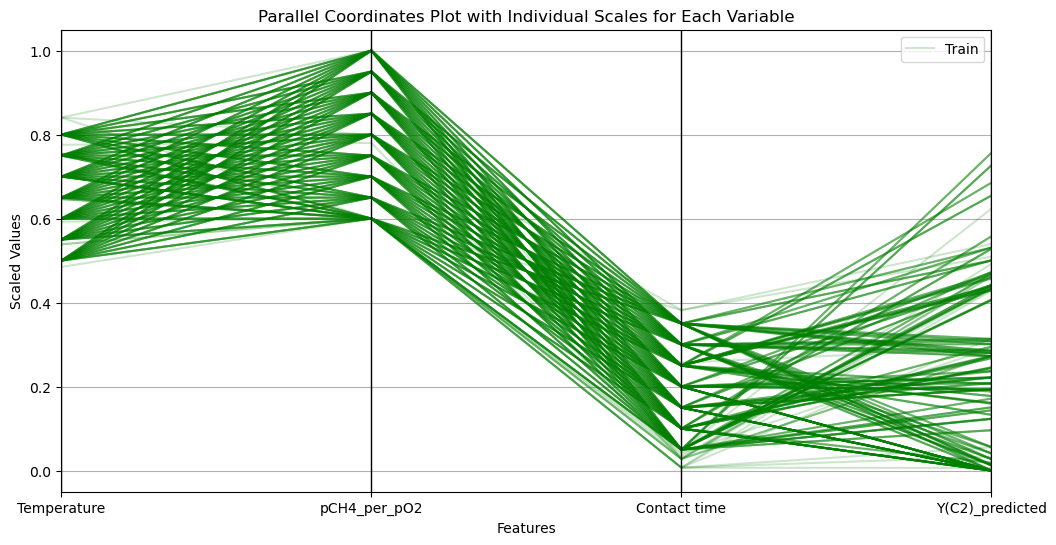

In [24]:
# Creating the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(scaled_combined_train_data, 'DataSet', color=['green'], alpha=0.2)
plt.title('Parallel Coordinates Plot with Individual Scales for Each Variable')
plt.ylabel('Scaled Values')
plt.xlabel('Features')
plt.show()

In [20]:
combined_data = pd.concat([train_set, test_set])

In [21]:
combined_data

,Temperature,pCH4_per_pO2,Contact time,Y(C2)_predicted,DataSet
0,1083.0,4.9,0.040,12.047283,Train
1,1023.0,4.0,0.060,7.919782,Train
2,1073.0,4.0,0.550,14.661379,Train
3,1073.0,5.0,0.550,13.831947,Train
4,1023.0,4.0,0.370,7.904139,Train
...,...,...,...,...,...
8911,1187.0,6.0,1.152,20.409223,Test
8912,1187.0,6.0,1.224,20.409223,Test
8913,1187.0,6.0,1.296,20.409223,Test
8914,1187.0,6.0,1.368,20.409223,Test


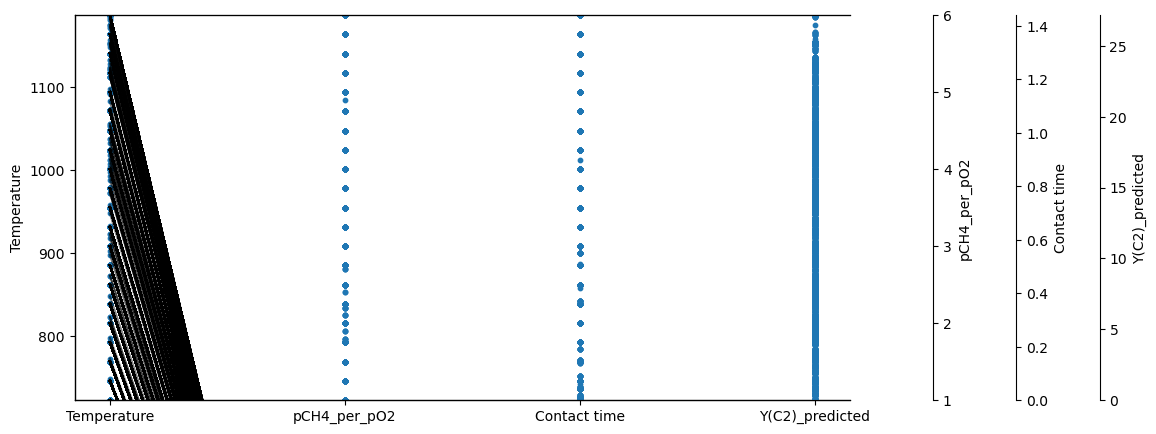

In [22]:
import matplotlib.ticker as ticker

def custom_parallel_coordinates(df, columns):
    """
    Creates a parallel coordinates plot for the specified DataFrame and columns,
    where each variable is plotted against its own y-axis with its original scale.
    
    Args:
    df (DataFrame): The DataFrame containing the data to plot.
    columns (list): A list of column names to include in the plot.
    """
    # Create a figure and a single subplot
    fig, host = plt.subplots(figsize=(10, 5))
    
    # Hide the right and top spines
    host.spines['top'].set_visible(False)
    host.spines['right'].set_visible(False)
    
    # Generate a list of axes for plotting, one per column
    axes = [host] + [host.twinx() for _ in range(len(columns) - 1)]
    
    # Offset each twin axis to avoid overlapping
    for i, ax in enumerate(axes[1:], start=1):
        ax.spines['right'].set_position(('outward', 60 * i))
    
    # Plot each column on its respective axis
    for i, col in enumerate(columns):
        # Get min and max values for the current column
        ymin, ymax = df[col].min(), df[col].max()
        
        # Set the y-limits for this axis based on min and max values
        axes[i].set_ylim(ymin, ymax)
        
        # Set the label for this axis
        axes[i].set_ylabel(col)
        
        # Generate x values for the plot (one per column)
        x_values = np.full(df.shape[0], i)
        
        # Scatter plot for the individual data points
        axes[i].scatter(x_values, df[col], s=10)  # s is the marker size
    
    # Drawing lines between points for each row in the DataFrame
    for index, row in df.iterrows():
        for i in range(len(columns) - 1):
            # Coordinates for the start and end points
            x = [i, i + 1]
            y = [row[columns[i]], row[columns[i + 1]]]
            
            # Plot a line between the two points
            host.plot(x, y, 'k-', alpha=0.5)  # 'k-' for black line, alpha for transparency
    
    # Set the x-ticks to be the names of the columns
    host.set_xticks(range(len(columns)))
    host.set_xticklabels(columns)
    
    plt.show()

columns = ['Temperature', 'pCH4_per_pO2', 'Contact time', 'Y(C2)_predicted']

# Plotting
custom_parallel_coordinates(combined_data, columns)

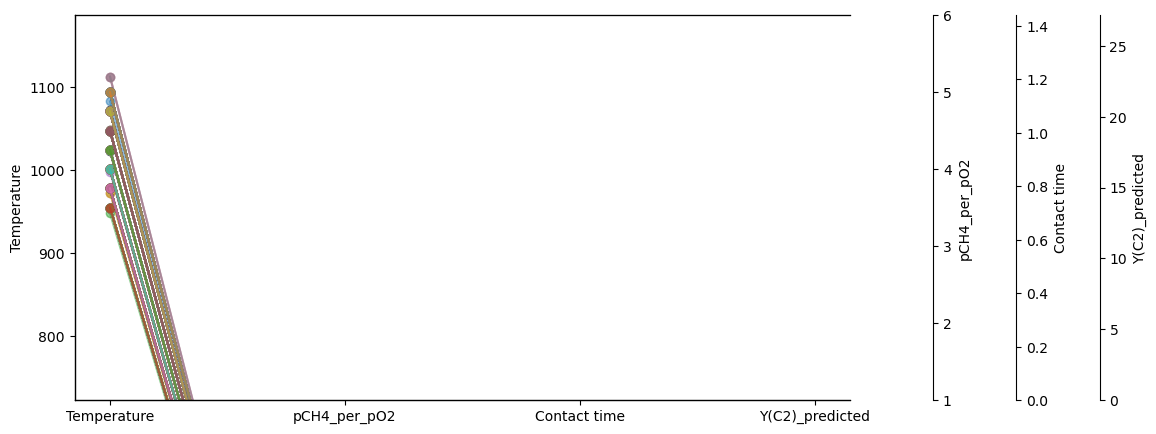

In [23]:
def custom_parallel_coordinates(df, columns, class_column='DataSet'):
    """
    Creates a parallel coordinates plot for the specified DataFrame and columns,
    where each variable is plotted against its own y-axis with its original scale.
    Only rows where the class_column is 'Train' are included in the plot.
    
    Args:
    df (DataFrame): The DataFrame containing the data to plot.
    columns (list): A list of column names to include in the plot.
    class_column (str): The name of the column used to filter rows for plotting.
    """
    # Filter the DataFrame for rows where class_column is 'Train'
    df_train = df[df[class_column] == 'Train']
    
    # Create a figure and a single subplot
    fig, host = plt.subplots(figsize=(10, 5))
    
    # Hide the right and top spines
    host.spines['top'].set_visible(False)
    host.spines['right'].set_visible(False)
    
    # Generate a list of axes for plotting, one per column
    axes = [host] + [host.twinx() for _ in range(len(columns) - 1)]
    
    # Offset each twin axis to avoid overlapping
    for i, ax in enumerate(axes[1:], start=1):
        ax.spines['right'].set_position(('outward', 60 * i))
        ax.spines['right'].set_visible(True)  # Make sure the spine is visible
    
    # Set the limits and labels for each axis based on the data
    for i, col in enumerate(columns):
        ymin, ymax = df[col].min(), df[col].max()
        axes[i].set_ylim(ymin, ymax)
        axes[i].set_ylabel(col)
    
    # Drawing lines between points for each 'Train' row in the DataFrame
    for _, row in df_train.iterrows():
        y_values = [row[col] for col in columns]
        host.plot(range(len(columns)), y_values, '-o', alpha=0.5)  # Line with markers
    
    # Set the x-ticks to be the names of the columns
    host.set_xticks(range(len(columns)))
    host.set_xticklabels(columns)
    
    plt.show()

columns = ['Temperature', 'pCH4_per_pO2', 'Contact time', 'Y(C2)_predicted']

# Plotting
custom_parallel_coordinates(combined_data, columns)

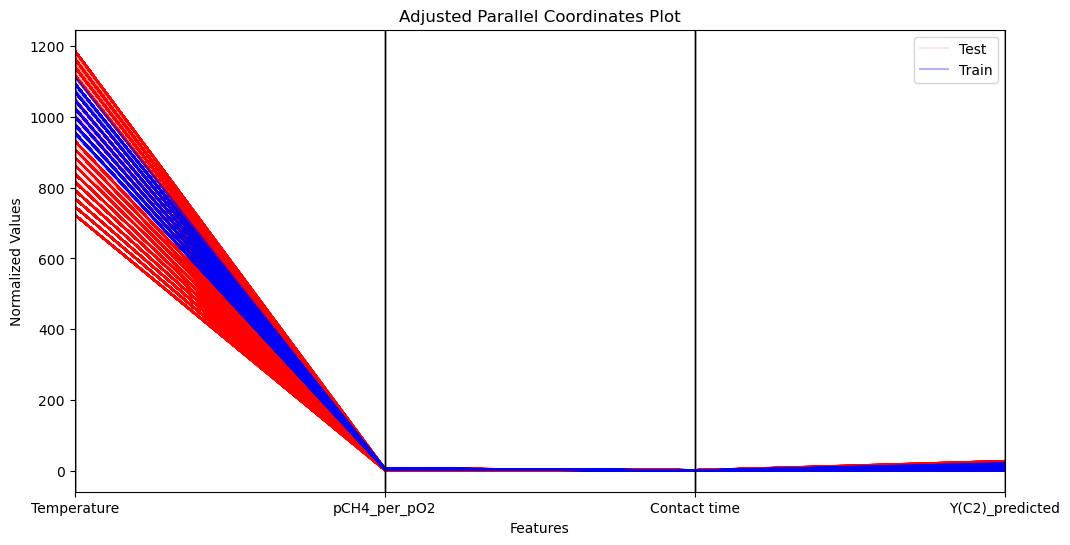

In [10]:
plt.figure(figsize=(12, 6))
# Plotting test set first so it's in the background
parallel_coordinates(combined_data[combined_data['DataSet'] == 'Test'], 'DataSet', color='red', alpha=0.1)
# Plotting train set on top
parallel_coordinates(combined_data[combined_data['DataSet'] == 'Train'], 'DataSet', color='blue', alpha=0.3)
plt.title('Adjusted Parallel Coordinates Plot')
plt.ylabel('Normalized Values')
plt.xlabel('Features')
plt.show()